<a href="https://colab.research.google.com/github/Shiva8164/car-condition-detection/blob/main/Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
car_data = pd.read_csv('/content/car.data')

In [ ]:
car_data.shape

(1727, 7)

In [ ]:
car_data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


<Axes: xlabel='vhigh', ylabel='count'>

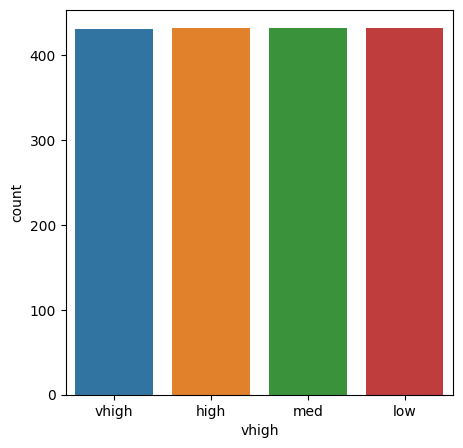

In [ ]:
plt.figure(figsize = (5, 5))
sns.countplot(x = 'vhigh', data = car_data)

<Axes: xlabel='vhigh.1', ylabel='count'>

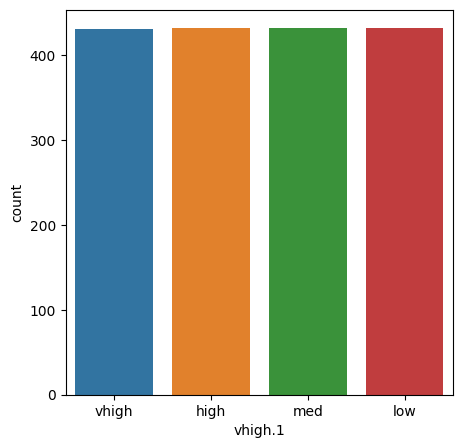

In [ ]:
plt.figure(figsize = (5, 5))
sns.countplot(x = 'vhigh.1', data = car_data)

<Axes: xlabel='2', ylabel='count'>

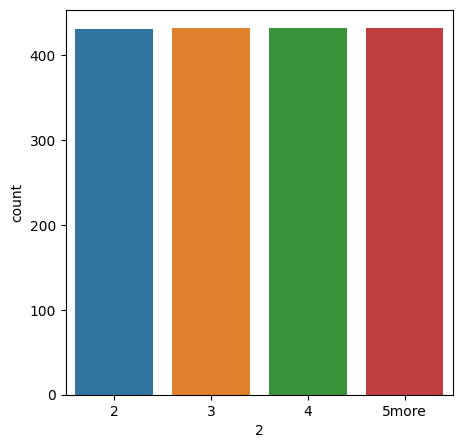

In [ ]:
plt.figure(figsize = (5, 5))
sns.countplot(x = '2', data = car_data)

<Axes: xlabel='2.1', ylabel='count'>

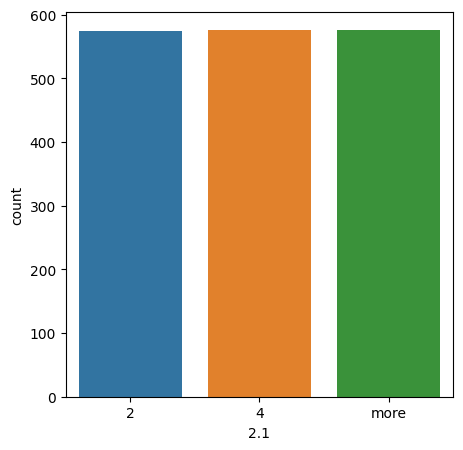

In [ ]:
plt.figure(figsize = (5, 5))
sns.countplot(x = '2.1', data = car_data)

<Axes: xlabel='small', ylabel='count'>

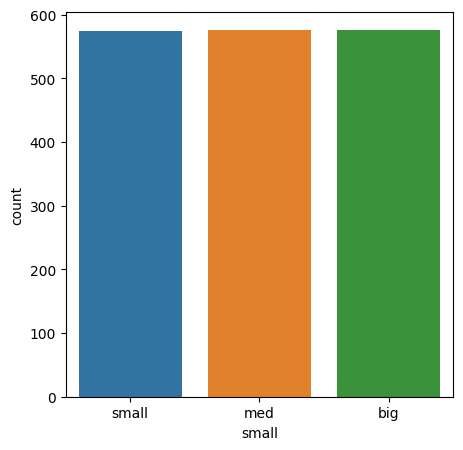

In [ ]:
plt.figure(figsize = (5, 5))
sns.countplot(x = 'small', data = car_data)

<Axes: xlabel='low', ylabel='count'>

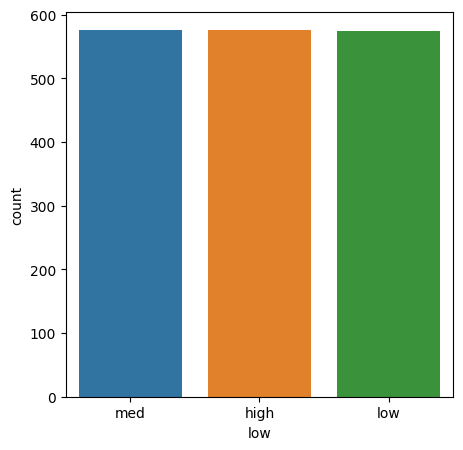

In [ ]:
plt.figure(figsize = (5, 5))
sns.countplot(x = 'low', data = car_data)

<Axes: xlabel='unacc', ylabel='count'>

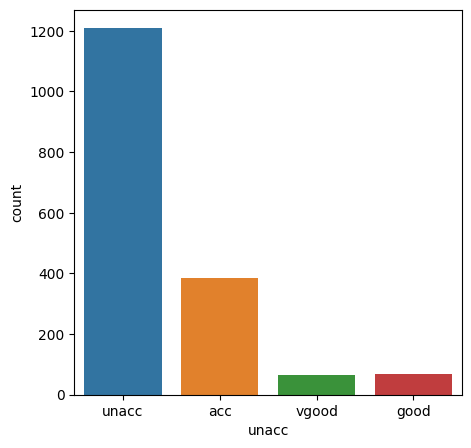

In [ ]:
plt.figure(figsize = (5, 5))
sns.countplot(x = 'unacc', data = car_data)

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
car_data = car_data.replace(to_replace = '5more', value = 5)

In [ ]:
car_data = car_data.replace(to_replace = 'more', value = 6)

In [ ]:
car_data.replace({"vhigh":{'vhigh':1, 'high':2, 'med':3, 'low':4},"vhigh.1":{'vhigh':1, 'high':2, 'med':3, 'low':4},"small":{'small':1, 'med':2, 'big':3},"low":{'med':1, 'high':2, 'low':3},"unacc":{'unacc':1, 'acc':2, 'vgood':3, 'good':4}}, inplace = True)

In [ ]:
car_data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,1,1,2,2,1,1,1
1,1,1,2,2,1,2,1
2,1,1,2,2,2,3,1
3,1,1,2,2,2,1,1
4,1,1,2,2,2,2,1


In [ ]:
X = car_data.drop(columns = 'unacc', axis = 1)
Y = car_data['unacc']

In [ ]:
car_data['unacc'].value_counts()

1    1209
2     384
4      69
3      65
Name: unacc, dtype: int64

In [ ]:
X.head()

,vhigh,vhigh.1,2,2.1,small,low
0,1,1,2,2,1,1
1,1,1,2,2,1,2
2,1,1,2,2,2,3
3,1,1,2,2,2,1
4,1,1,2,2,2,2


In [ ]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: unacc, dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(1727, 6) (1208, 6) (519, 6)


In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
X_train_prediction = classifier.predict(X_train)
train_accuracy = accuracy_score(X_train_prediction, Y_train)
print(train_accuracy)

1.0


In [ ]:
X_test_prediction = classifier.predict(X_test)
test_accuracy = accuracy_score(X_test_prediction, Y_test)
print(test_accuracy)

0.9633911368015414


In [ ]:
input_data = (1,3,2,4,3,1)
input_data_numpy = np.asarray(input_data)
print(input_data_numpy)
input_data_reshape = input_data_numpy.reshape(1, -1)
print(input_data_reshape)
prediction = classifier.predict(input_data_reshape)
if prediction == 1:
  print('The car is Unacceptable')
elif prediction == 2:
  print('The car is acceptable')
elif prediction == 3:
  print('Car is Very Good')
else:
  print('Car is Good')

[1 3 2 4 3 1]
[[1 3 2 4 3 1]]
The car is acceptable


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
